#### 6.1.1

In [11]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)

##　Following writing way is avairable
'''
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' 
                  'breast-cancer-wisconsin/wdbc.data',header=None)
'''

"\ndf = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' \n                  'breast-cancer-wisconsin/wdbc.data',header=None)\n                  "

In [36]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)

In [28]:
le.transform(['M','B'])

array([1, 0], dtype=int64)

In [24]:
le.classes_

array(['B', 'M'], dtype=object)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, \
                                                   stratify=y, random_state=1)

#### 6.2.2 stratified k-fold cross-validation

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), \
                       PCA(n_components=2), \
                       LogisticRegression(random_state=1)
                       )
pipe_lr.fit(X_train,y_train)
y_pred = pipe_lr.predict(X_test)

In [42]:
import numpy as np

from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, random_state=1).split(X_train,y_train)
scores = []

for k, (train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % \
           (k+1, np.bincount(y_train[train]), score))

    print('\nCV accuracy] %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    

Fold:  1, Class dist.: [256 153], Acc: 0.935

CV accuracy] 0.935 +/- 0.000
Fold:  2, Class dist.: [256 153], Acc: 0.935

CV accuracy] 0.935 +/- 0.000
Fold:  3, Class dist.: [256 153], Acc: 0.957

CV accuracy] 0.942 +/- 0.010
Fold:  4, Class dist.: [256 153], Acc: 0.957

CV accuracy] 0.946 +/- 0.011
Fold:  5, Class dist.: [256 153], Acc: 0.935

CV accuracy] 0.943 +/- 0.011
Fold:  6, Class dist.: [257 153], Acc: 0.956

CV accuracy] 0.945 +/- 0.011
Fold:  7, Class dist.: [257 153], Acc: 0.978

CV accuracy] 0.950 +/- 0.015
Fold:  8, Class dist.: [257 153], Acc: 0.933

CV accuracy] 0.948 +/- 0.015
Fold:  9, Class dist.: [257 153], Acc: 0.956

CV accuracy] 0.949 +/- 0.014
Fold: 10, Class dist.: [257 153], Acc: 0.956

CV accuracy] 0.950 +/- 0.014


### 6.3.1 Variance and Bias

In [55]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(), \
                      LogisticRegression(penalty='l2', random_state=1) )

train_sizes, train_scores,test_scores = learning_curve(estimator=pipe_lr, \
                                                     X=X_train, \
                                                     y=y_train, \
                                                     train_sizes=np.linspace(0.1,1.0,10), \
                                                     cv=10, \
                                                     n_jobs=1)



train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
%matplotlib inline
plt.plot(train_sizes,train_mean, \
         color='blue',marker='o', \
         markersize=5, \
         label='training accuracy')

plt.fill_between(train_sizes, \
                 train_mean + train_std, \
                 train_mean - train_std, \
                 alpha=0.15, color='blue')

plt.plot(train_sizes, train_mean, \
         color='blue', \
         linestyle='--' , \
         marker='s', \
         markersize=5, \
         label='Validation accuracy'
        )

plt.fill_between(train_sizes, \
         test_mean + test_std, \
         test_mean - test_std, \
         alpha=0.15, color='green'
         )

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0125])
plt.tight_layout()
plt.show()

C:\Users\yueki\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


### 6.3.2 Validation Curve

In [79]:
from sklearn.model_selection import validation_curve
param_range= [0.001, 0.01,0.1,1.,10.,100.]

train_scores, test_scores = validation_curve(estimator=pipe_lr, \
                                                     X=X_train, \
                                                     y=y_train, \
                                                     param_name='logisticregression__C',
                                                     param_range=param_range, \
                                                     cv=10, \
                                                     n_jobs=1)




In [80]:
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)


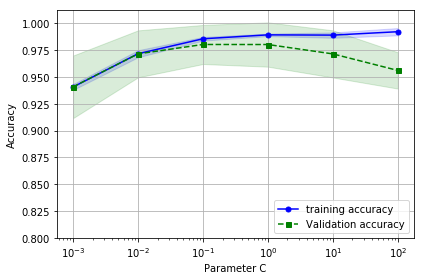

In [90]:

%matplotlib inline
plt.plot(param_range,train_mean, \
         color='blue',marker='o', \
         markersize=5, \
         label='training accuracy')

plt.fill_between(param_range, \
                 train_mean + train_std, \
                 train_mean - train_std, \
                 alpha=0.15, color='blue'
                )

plt.plot(param_range, test_mean, \
         color='green', \
         linestyle='--' , \
         marker='s', \
         markersize=5, \
         label='Validation accuracy'
        )

plt.fill_between(param_range, \
         test_mean + test_std, \
         test_mean - test_std, \
         alpha=0.15, color='green'
         )

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8,1.0125])
plt.tight_layout()
plt.show()